<a href="https://colab.research.google.com/github/melvinwevers/audio_analysis/blob/main/1-working-with-audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub

In [ ]:
# we will clone the repo, so we can easily access the audio data through Colab.
!git clone https://github.com/melvinwevers/audio_analysis.git
%cd audio_analysis/

Cloning into 'audio_analysis'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 57 (delta 0), reused 5 (delta 0), pack-reused 50
Receiving objects: 100% (57/57), 56.22 MiB | 11.33 MiB/s, done.


# Working with Audio

In this notebook:
1. We will look into file handling relating to audio files.
2. We will process audio and extract different types of features from these audio files.
3. Lastly, we will briefly show how such features can be used in a classification task.

We will rely mostly on the `Librosa` library, but there are many more to explore. For example, `pyAudioAnalysis`.

In [ ]:
import librosa
from IPython.display import Audio
import numpy as np
import pandas as pd
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt

## The Audio

As sample data, I have included audio clips extracted from two different archives held by the _Meertens_ Institute in Amsterdam.
This institute studies Dutch language and culture.

1. The first data set includes songs from the _Liederenbank_. These are Dutch folk songs.
2. The second data includes interviews from the _Volksverhalenbank_. These are oral interviews through which folk stories were collected.

Both folders contain a `metadata.csv` and a `data` folder. In the later, we find the raw audio files (mp3) and transcriptions. The former is an aggregate of the two.

In [ ]:
!ls data/liederenbank/data

OGL08404.mp3		   OGL14103b_NLB71625.txt  OGL32116.mp3		  OGL34408_NLB74602.txt
OGL08404_NLB70741.txt	   OGL22024.mp3		   OGL32116_NLB74301.txt  OGL34904.mp3
OGL08703.mp3		   OGL22024_NLB72795.txt   OGL33608.mp3		  OGL34904_NLB74639.txt
OGL08703_OGL_NLB70769.txt  OGL29408.mp3		   OGL33608_NLB74526.txt  OGL40109_OGL_NLB75377.txt
OGL14103b.mp3		   OGL29408_NLB73890.txt   OGL34408.mp3


In [ ]:
# Here we use Pandas to inspect the metadata file belonging to the Liederenbank
df = pd.read_csv('data/liederenbank/metadata.csv')
df.head()

file_name                                      transcription
0  data/OGL08703.mp3  De klok der toren had negen geslagen\nEn 't kn...
1  data/OGL40109.mp3  Kom vrienden luistert naar mijn lied,\nKom vri...
2  data/OGL34904.mp3  1 Er was een boerin in Baokel,\nEen Baokelse b...
3  data/OGL34408.mp3  In het huisje waar ik vrijen ging,\n’t Lag tus...
4  data/OGL33608.mp3  Ik heb ’r es horen zingen van een klucht in he...

## File Handling and Conversion

The raw data is in mp3 format. We will now convert these into wave files. Even though we cannot restore the audio fidelity that was lost during the compression into the smaller mp3 format, wave files are a more common format and are easier to work with across libraries. Working with mp3s can sometimes leads to conversion errors.

In [ ]:
# here we define an input path, i.e. the original mp3, a
# and an output path, or the name of the file that we want to save

input_path = 'data/liederenbank/data/OGL14103b.mp3'
output_path = 'data/OGL14103b.wav'

In [ ]:
# We use the AudioSegment Library to load the mp3 and convert it into a wave file.
# You can try and export to different audio formats.
sound = AudioSegment.from_mp3(input_path)
sound.export(output_path, format='wav')

<_io.BufferedRandom name='data/OGL14103b.wav'>

In [ ]:
Audio(data=y, rate=sr) # long clips might need to be clipped. You can use Python slicing.

In [ ]:
# y = audiosignal,
# sr = signal rate. We specify the signal rate (or hz) at 44.1Khz.
# This is a default value for wave, or audio found on, for example, compact discs.
y, sr = librosa.load(output_path, sr=44100)

print(f'The audio signal is a: {type(y)}')
print(f'The Signal Rate is: {sr}')

The audio signal is a: <class 'numpy.ndarray'>
The Signal Rate is: 44100


In [ ]:
Audio(data=y, rate=sr) # long clips might need to be clipped. You can use Python slicing.

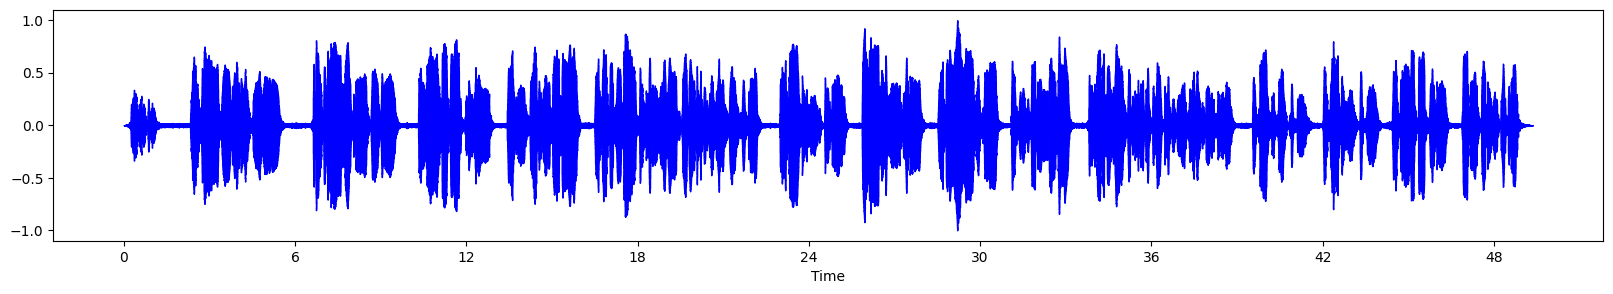

In [ ]:
plt.figure(figsize=(20,3))
librosa.display.waveshow(y, sr=sr, color='blue')
plt.show()

###  Exercises
1. Try and slice the audio file to a shorter segment
2. Load a different file and plot them, either side-by-side, or in one plot.
3. Describe the differences between the two sound files, from looking at the waveform?
4. Change the 'numbers' in the signal, through multiplication, normalizing, etc? These are all just numbers in a numpy array. Describe what happens to the sound after the adjustments.

# Features

## Spectral Features

Audio features that capture information on frequency and power distribution. This maps onto timbre and texture of sounds across different frequencies.

### Mel-Spectrogram

The mel-scale is a perceptual scale of pitches. It is used for classification and retrieval tasks. Rather than using the raw signal it relates to the perception of sound,  i.e. how we hear sounds.

In [ ]:
# compute mel-spectogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

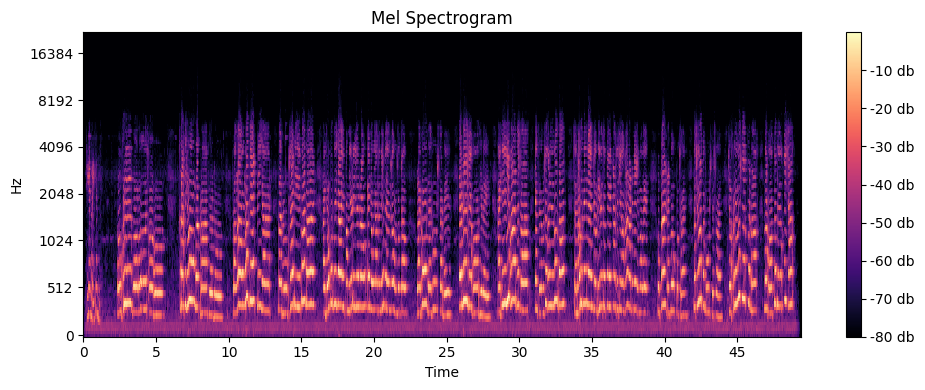

In [ ]:
plt.figure(figsize=(10 ,4))
# power_to_db converts spectrogram to logarithmic power (i.e. a way to express it in Decibels)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sr, hop_length=512, y_axis="mel", x_axis="time")
plt.colorbar(format="%+2.0f db")
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

#### Exercise
1. Describe what you see in the Mel Spectrogram
2. Plot the same for a different audio file.

## Mel-Frequency Cepstral Coefficients

A cepstrum (reverse of Spectrum) is the outcome of a mathematical transformation. The aim is to better understand periodic structures in sound. More info [here](https://en.wikipedia.org/wiki/Cepstrum).

Using Cepstrals (plural of cepstrum) allows you to separate the different sources producing variation in the sound, for example different instruments or multiple people speaking.

The Mel Spectrogram provides a time-frequency representation of the audio signal, while MFCCs are a compact representation of spectral features.


In [ ]:
# extracting Mel-Frequency Cepstral Coefficients
mfccs = librosa.feature.mfcc(y=y, sr=sr)
# convert mel spectrogram to MFCC in logarithmic form
mfccs_dbs = librosa.feature.mfcc(S=librosa.power_to_db(mel_spectrogram), sr=sr)


## Spectral Contrast

Technique to measure differences in magnitudes between adjacent frequency bands. A higher spectral contrast refers to a 'brighter' sound, while less contrast refers to 'duller' sounds.

In [ ]:
spectral_contrast = librosa.feature.spectral_contrast(y=y, n_fft=2048, hop_length=512)

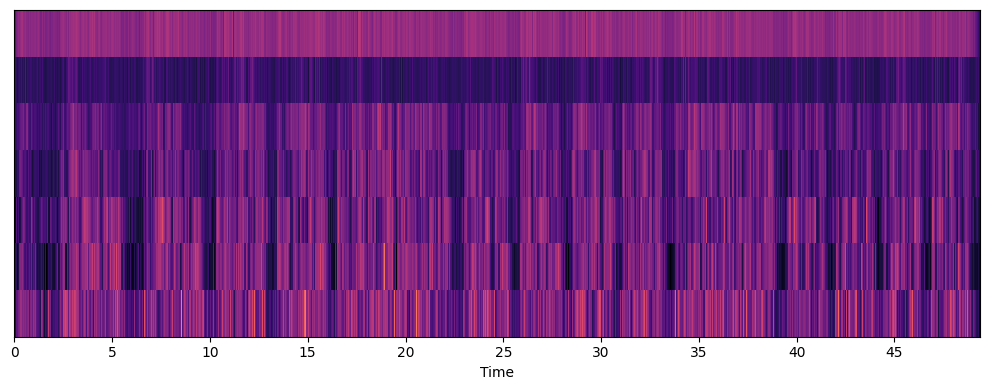

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.specshow(spectral_contrast, sr=sr, hop_length=512, x_axis="time")
plt.tight_layout()
plt.show()

#### Exercise
1. What does the spectral contrast represent for your clip?
2. How does this relate to Mel-Spectrogram?
3. Load a different clip and compare the output.

## Chroma Features

These features capture the harmonic and melodic structure. Each feature mapts onto a pitch class (C, C#, D, D# etc.)

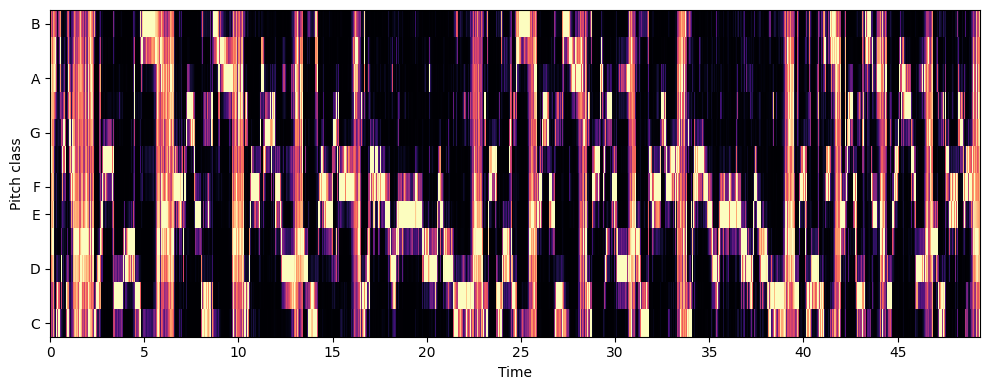

In [ ]:
chroma_features = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_features, sr=sr, hop_length=512, x_axis="time", y_axis="chroma")
plt.tight_layout()
plt.show()

### Classification using features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
def convert_mp3_to_wav(mp3_folder, wav_folder):
  """
  Converts all MP3 audio files in a specified folder to WAV format and saves them in another folder.

  Parameters:
    - mp3_folder (str): The path to the source folder containing MP3 files to be converted.
    - wav_folder (str): The path to the target folder where the converted WAV files will be saved.
  """

  # Check if the source folder exists
  if not os.path.isdir(mp3_folder):
      raise ValueError(f"The source folder '{mp3_folder}' does not exist or is not a directory.")

  # Create the target folder if it doesn't exist
  os.makedirs(wav_folder, exist_ok=True)

  # Initialize a counter to track the number of files converted
  converted_files_count = 0

  for mp3_file in os.listdir(mp3_folder):
      if mp3_file.lower().endswith(".mp3"):
          mp3_path = os.path.join(mp3_folder, mp3_file)
          wav_file_name = os.path.splitext(mp3_file)[0] + ".wav"
          wav_path = os.path.join(wav_folder, wav_file_name)

          try:
              # Load MP3 audio and convert to WAV
              audio = AudioSegment.from_mp3(mp3_path)
              audio.export(wav_path, format="wav")
              print(f"Converted '{mp3_file}' to '{wav_file_name}'")
              converted_files_count += 1
          except Exception as e:
              print(f"Failed to convert '{mp3_file}' due to an error: {e}")

  if converted_files_count == 0:
      print("No MP3 files found to convert.")
  else:
      print(f"Successfully converted {converted_files_count} files.")

In [ ]:
# convert liederenbank
mp3_folder = "data/liederenbank/data/"
wav_folder = "data/liederenbank_wave"

# Convert MP3 files to WAV
convert_mp3_to_wav(mp3_folder, wav_folder)

Converted 'OGL33608.mp3' to 'OGL33608.wav'
Converted 'OGL29408.mp3' to 'OGL29408.wav'
Converted 'OGL14103b.mp3' to 'OGL14103b.wav'
Converted 'OGL22024.mp3' to 'OGL22024.wav'
Converted 'OGL08404.mp3' to 'OGL08404.wav'
Converted 'OGL34408.mp3' to 'OGL34408.wav'
Converted 'OGL08703.mp3' to 'OGL08703.wav'
Converted 'OGL32116.mp3' to 'OGL32116.wav'
Converted 'OGL34904.mp3' to 'OGL34904.wav'
Successfully converted 9 files.


In [ ]:
# convert ovv
mp3_folder = "data/vvb/data/"
wav_folder = "data/vvb_wave"

# Convert MP3 files to WAV
convert_mp3_to_wav(mp3_folder, wav_folder)

Converted 'VODA_037_09.mp3' to 'VODA_037_09.wav'
Converted 'VODA_004_19.mp3' to 'VODA_004_19.wav'
Converted 'VODA_022_14.mp3' to 'VODA_022_14.wav'
Converted 'VODA_037_22.mp3' to 'VODA_037_22.wav'
Converted 'VODA_010_08A.mp3' to 'VODA_010_08A.wav'
Converted 'VODA_037_07.mp3' to 'VODA_037_07.wav'
Converted 'VODA_037_20.mp3' to 'VODA_037_20.wav'
Converted 'VODA_037_18.mp3' to 'VODA_037_18.wav'
Converted 'VODA_015_08.mp3' to 'VODA_015_08.wav'
Converted 'VODA_012_28.mp3' to 'VODA_012_28.wav'
Successfully converted 10 files.


In [ ]:
def extract_features(file_path, feature_type='mfcc', **kwargs):
    """
    Extracts specified audio features from a given audio file.

    Parameters:
    - file_path (str): Path to the audio file.
    - feature_type (str): Type of audio feature to extract. Supported types are 'mfcc', 'chroma', and 'spectral_contrast'.
    - **kwargs: Additional keyword arguments to pass to the Librosa feature extraction function.

    Returns:
    - np.ndarray: Extracted audio features.
    """
    # Validate the feature type
    if feature_type not in ['mfcc', 'chroma', 'spectral_contrast']:
        raise ValueError("Unsupported feature_type. Please choose from 'mfcc', 'chroma', 'spectral_contrast'")

    # Load the audio file
    try:
        y, sr = librosa.load(file_path)
    except Exception as e:
        raise Exception(f"Error loading audio file: {e}")

    # Feature extraction using dictionary mapping
    feature_functions = {
        'mfcc': librosa.feature.mfcc,
        'chroma': librosa.feature.chroma_stft,
        'spectral_contrast': librosa.feature.spectral_contrast
    }

    # Extract features
    try:
        features = feature_functions[feature_type](y=y, sr=sr, **kwargs)
        # Compute the mean of the features
        features = np.mean(features, axis=1)
    except Exception as e:
        raise Exception(f"Error extracting {feature_type} features: {e}")

    return features



def process_files(folder, label, feature_type, X, y):
    """
    Processes audio files in a specified folder, extracting features and returning input for classification.

    Parameters:
    - folder (str): Path to the folder containing audio files.
    - label (str or int): Label to assign to all files processed from this folder.
    - feature_type (str): Type of audio feature to extract (e.g., 'mfcc', 'chroma', 'spectral_contrast').
    - X (list): List to append extracted features to.
    - y (list): List to append labels to.
    """
    # Check if the specified folder exists
    if not os.path.isdir(folder):
        raise ValueError(f"The specified folder '{folder}' does not exist or is not a directory.")

    processed_files_count = 0

    for file_name in os.listdir(folder):
        if file_name.lower().endswith('.wav'):
            file_path = os.path.join(folder, file_name)

            try:
                features = extract_features(file_path, feature_type=feature_type)
                X.append(features)
                y.append(label)
                processed_files_count += 1
            except Exception as e:
                print(f"Failed to process '{file_name}' due to an error: {e}")

    if processed_files_count == 0:
        print(f"No '.wav' files found in '{folder}'.")
    else:
        print(f"Successfully processed {processed_files_count} files from '{folder}'.")


## Preparing the data for classification

In [ ]:
# Paths to the folders containing WAV files for different classes
class1_folder = "data/liederenbank_wave/"
class2_folder = "data/vvb_wave/"

# Extract features and create dataset
X = []
y = []


feature_type = 'mfcc'  # 'spectral_contrast', 'mfcc', 'chroma'

# Process files from both classes
process_files(class1_folder, 0, feature_type, X, y)
process_files(class2_folder, 1, feature_type, X, y)

X = np.array(X)
y = np.array(y)


Successfully processed 9 files from 'data/liederenbank_wave/'.
Successfully processed 10 files from 'data/vvb_wave/'.


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test_scaled)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



### Exercises
1. Vary the feature type
2. Describe what the classification algorithm does
3. Try replicating this on your own dataset of audio files (_optional_)